# ***Amazon Product Reviews***

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arhamrumi/amazon-product-reviews")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/amazon-product-reviews


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
import os

# Dataset path from kagglehub
dataset_path = "/kaggle/input/amazon-product-reviews"

# List files in dataset
print(os.listdir(dataset_path))

# Load CSV
df = pd.read_csv(os.path.join(dataset_path, "Reviews.csv"))

df = df.sample(6000,random_state = 1)

['Reviews.csv']


In [7]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

**Since for Sentiment Analysis we Require only two columns text and score**

In [8]:
pd.set_option('display.max_colwidth',200)
df = df[['Text','Score']]

In [9]:
df

,Text,Score
288312,"I love the Cherry Pie Lara bar. Best and tasty bar for when my sugar is low. I recomend this Bar for diabetics low sugar only, as the carbs are about 30 for the bar.",5
431726,"Melitta Cafe COllection Blanc et Noir coffee has a very smooth, refined armoma you notice as soon as you open up the package. That same aroma translates well throughout the brewing process and rem...",5
110311,my girls absolutely loved this tuna. they were in heaven and couldn't get enough of this tasty treat. A bit pricey since I do have 4 cats and the pack went super fast giving each of them a treat,5
91855,The vendor is fast and dependable. The tea is simply the best way to relax and great tasting too. Highly recommend !!,5
338855,"UPDATE - 8/9/2010<br />A lot can happen in just a couple months, the last two cases of these I have ordered from Amazon have been horrible. I've had whole artichoke leaves in several cans (not th...",5
...,...,...
240894,"I can't give much of a review until I have my cholesterol drawn which won't be until this summer......I received them in a timely manner and they taste great....after my cholesterol is drawn, I'll...",4
341166,"these are yummy cotton candy pops like never before :) great pops, were used for a class party and the kids were indeed pleased",5
342299,"YUMMY chocolate... to be ordered with other stuff, why? Then its packed in a box. Round is a sphere usually.",4
533599,I've suffered from sleeplessness for many years and refuse to try any medications or pills to help me. After trying more than ten variety of tea brands (all still sitting in my kitchen!) to help m...,5


In [10]:
df.shape

(6000, 2)

In [11]:
df.isnull().sum()

,0
Text,0
Score,0


In [12]:
df.duplicated().sum()

np.int64(59)

In [13]:
df.drop_duplicates(keep = 'first',inplace = True)

In [14]:
df.shape

(5941, 2)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5941 entries, 288312 to 60927
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    5941 non-null   object
 1   Score   5941 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 139.2+ KB


In [16]:
df['Score'].value_counts()

,count
Score,
5,3760
4,854
1,554
3,466
2,307


# ***EDA***

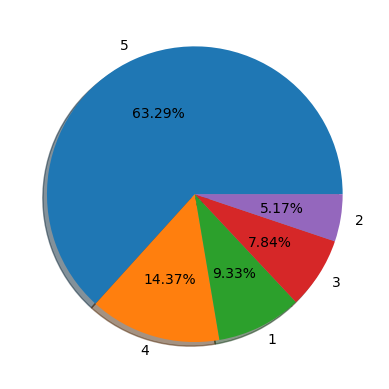

In [17]:
plt.pie(df['Score'].value_counts(),labels=df['Score'].value_counts().index,autopct='%1.2f%%',shadow=True)
plt.show()

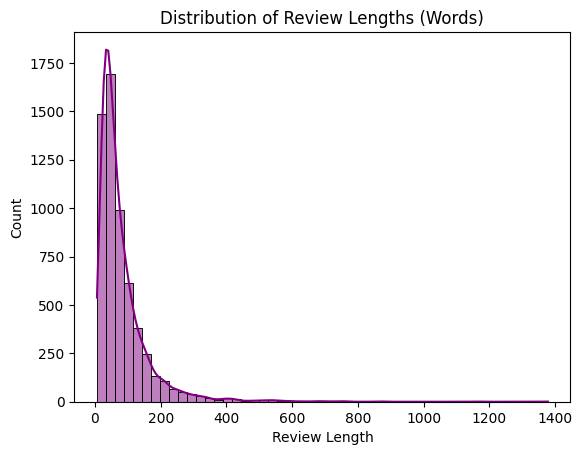

In [18]:
df['review_length_words'] = df['Text'].apply(lambda x: len(x.split()))
sns.histplot(df['review_length_words'], bins=50, kde=True,color='purple')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.title('Distribution of Review Lengths (Words)')
plt.show()

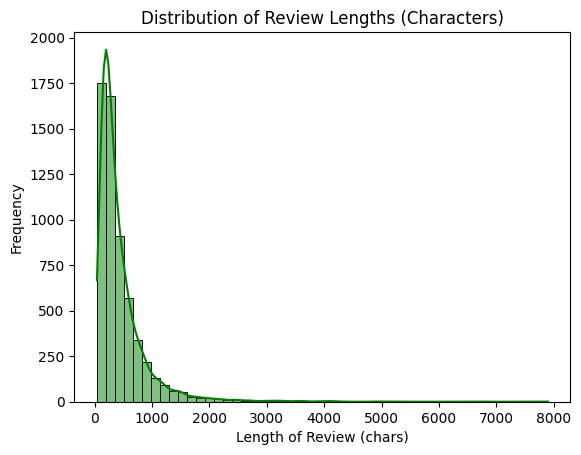

In [19]:
df['review_length_characters'] = df['Text'].apply(len)
sns.histplot(df['review_length_characters'], bins=50, kde=True, color="green")
plt.title("Distribution of Review Lengths (Characters)")
plt.xlabel("Length of Review (chars)")
plt.ylabel("Frequency")
plt.show()

In [20]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

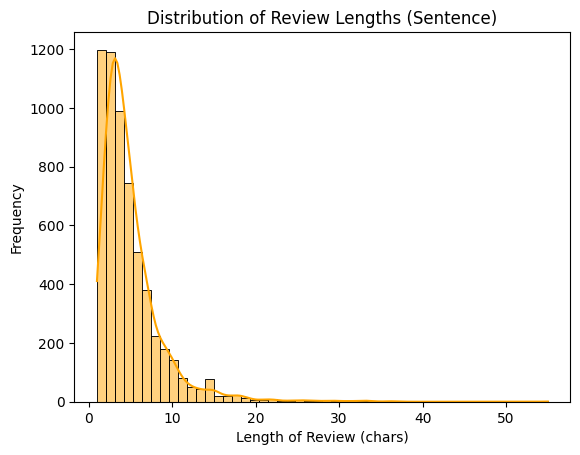

In [21]:
df['review_length_sentence'] = df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))
sns.histplot(df['review_length_sentence'], bins=50, kde=True, color="orange")
plt.title("Distribution of Review Lengths (Sentence)")
plt.xlabel("Length of Review (chars)")
plt.ylabel("Frequency")
plt.show()

In [22]:
from collections import Counter
import re

# Convert all text to lowercase
text_data = " ".join(df['Text'].astype(str).tolist()).lower()

# Remove punctuation & numbers
text_data = re.sub(r'[^a-z\s]', '', text_data)

# Split into words
words = text_data.split()

# Count word frequencies
word_counts = Counter(words)

# Take Top 20 most common words
common_words = word_counts.most_common(20)

# Convert to DataFrame
common_df = pd.DataFrame(common_words, columns=["Word", "Count"])

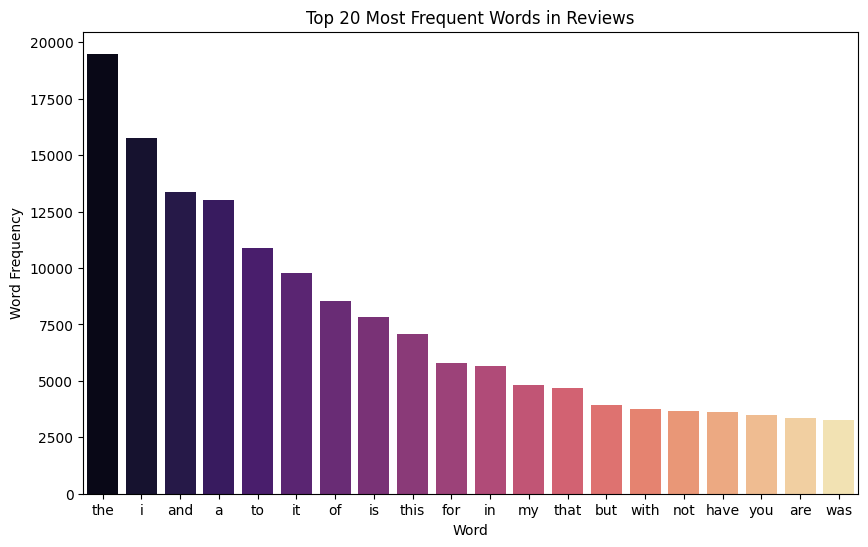

In [23]:
# Plot bar graph
plt.figure(figsize=(10,6))
sns.barplot(x="Word", y="Count", data=common_df, palette="magma")
plt.title("Top 20 Most Frequent Words in Reviews")
plt.xlabel("Word")
plt.ylabel("Word Frequency")
plt.show()

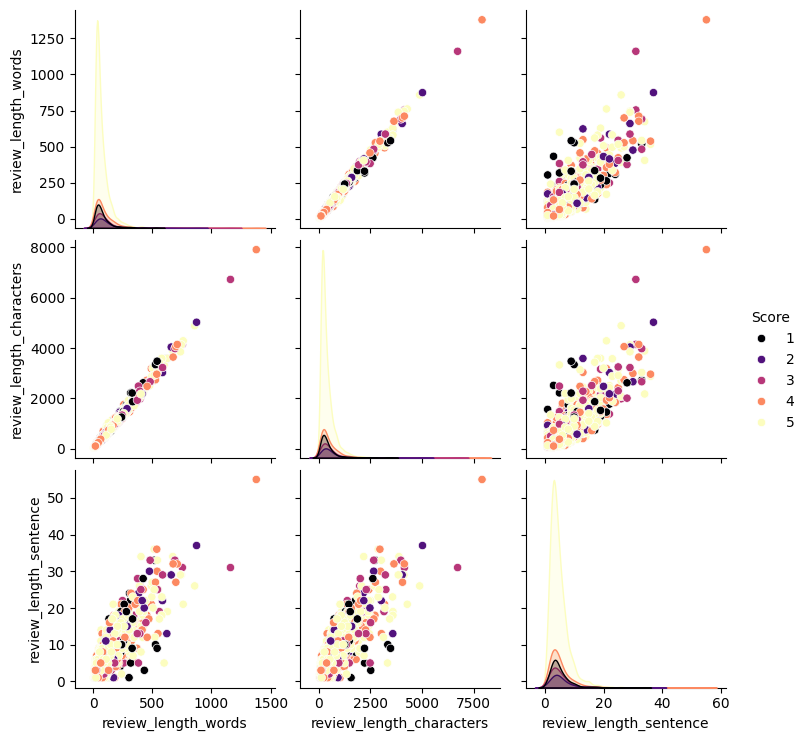

In [24]:
sns.pairplot(df,hue = 'Score',palette = 'magma')
plt.show()

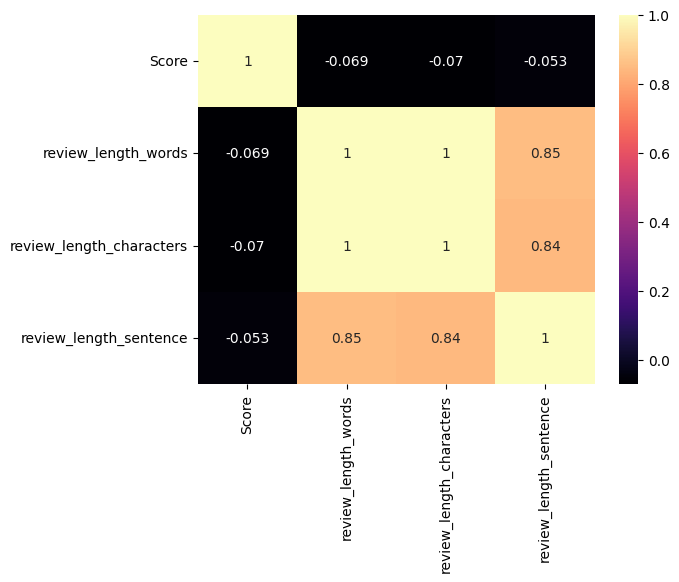

In [25]:
sns.heatmap(df.corr(numeric_only = True),annot = True, cmap = 'magma')
plt.show()

In [26]:
df.describe(exclude = 'O')

,Score,review_length_words,review_length_characters,review_length_sentence
count,5941.000000,5941.000000,5941.000000,5941.000000
mean,4.171352,81.725299,444.526511,5.030130
std,1.314614,82.011726,461.774864,3.807524
min,1.000000,6.000000,39.000000,1.000000
25%,4.000000,33.000000,179.000000,3.000000
50%,5.000000,56.000000,300.000000,4.000000
75%,5.000000,99.000000,535.000000,6.000000
max,5.000000,1378.000000,7898.000000,55.000000


# ***Text Preprocessing***

**1. Lower Case**

**2. Word Tokenization**

**3. Remove Special Characters**

**4. Remove stopwords and punctuations**

**5. Stemming**

In [27]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [28]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [29]:
import string

from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [30]:
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


def clean_text(text):
  # Lowercase
  text = text.lower()
  # Remove punctuation/numbers
  text = re.sub(r'[^a-z\s]', '', text)
  # Tokenize
  tokens = word_tokenize(text)
  # Remove stopwords
  tokens = [word for word in tokens if word not in stop_words]
  # Lemmatize
  tokens = [lemmatizer.lemmatize(word) for word in tokens]
  return " ".join(tokens)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [31]:
df['Text'] = df['Text'].apply(clean_text)

In [32]:
from wordcloud import WordCloud
word_cloud = WordCloud(width = 700,height = 700,min_font_size = 20)

In [33]:
positive_word_cloud = word_cloud.generate(df[df['Score'] >= 4]['Text'].str.cat(sep = ' '))

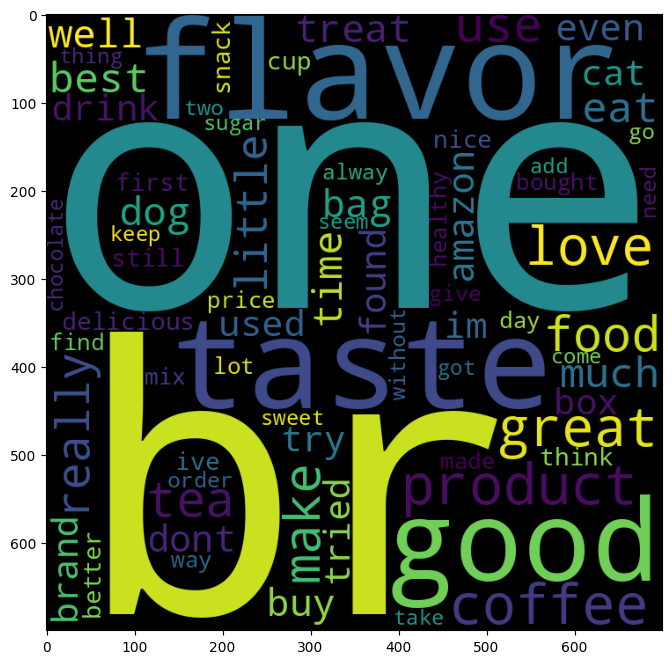

In [34]:
plt.figure(figsize = (10,8))
plt.imshow(positive_word_cloud)
plt.show()

In [35]:
negative_word_cloud = word_cloud.generate(df[df['Score'] <= 2]['Text'].str.cat(sep = ' '))

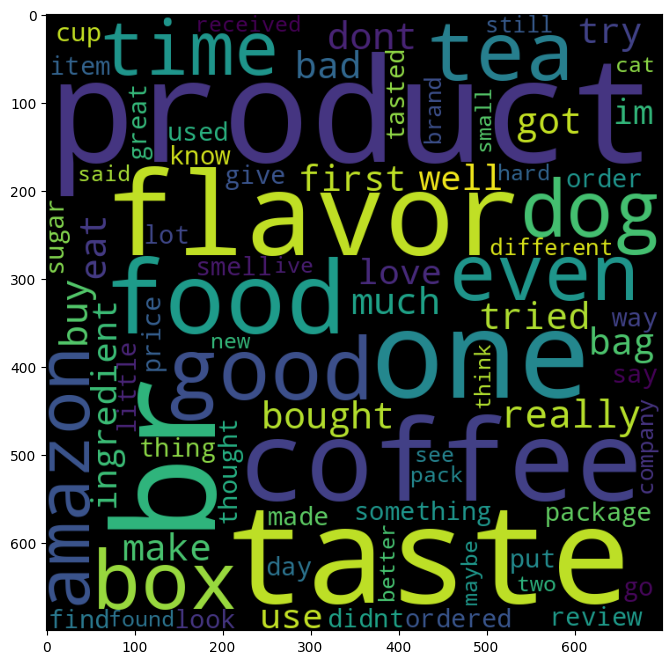

In [36]:
plt.figure(figsize = (10,8))
plt.imshow(negative_word_cloud)
plt.show()

# ***Model Building***

In [37]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['Text']).toarray()

In [38]:
X.shape

(5941, 18099)

In [39]:
y = df['Score'].values

In [40]:
y.shape

(5941,)

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB


from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report

In [43]:
from sklearn.model_selection import GridSearchCV

def best_model(x,y):
  models = {
      'Logistic Regression': {
          'model': LogisticRegression(),
          'parameters':{'C':[1,2,5],'penalty':['l1','l2','elasticnet']}
      },
      'Decision Tree Classifier':{
          'model': DecisionTreeClassifier(),
          'parameters':{'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':[5,10]}
      },
      'Random Forest Classifier':{
          'model': RandomForestClassifier(),
          'parameters':{'criterion':['gini','entropy'],'n_estimators':[1,2,10],'max_depth':[5,10]}
      },
      'Gaussian Naive Bayes Classifier':{
          'model': GaussianNB(),
          'parameters':{}
      },
      'Multinomial Naive Bayes Classifier':{
          'model': MultinomialNB(),
          'parameters':{}
      }

  }

  scores=[]
  for mod_name,mod_params in models.items():

    print(f'Model - {mod_name}')
    print()
    print('Paramters - ',mod_params)
    print()

    classifier = GridSearchCV(estimator = mod_params['model'],param_grid = mod_params['parameters'],cv = 3,scoring = 'accuracy')
    classifier.fit(x,y)
    scores.append({
        'model':mod_name,
        'Best Parameters':classifier.best_params_,
        'Best Score':classifier.best_score_
    })

    print(f'Best Parameters - {classifier.best_params_}')
    print()
    print(f'Accuracy Score - {classifier.best_score_}')
    print()
    print('='*150)


  return pd.DataFrame(scores,columns = ['model','Best Parameters','Best Score'])

In [44]:
pd.set_option('display.max_colwidth',200)
best_model(X_train,y_train)

Model - Logistic Regression

Paramters -  {'model': LogisticRegression(), 'parameters': {'C': [1, 2, 5], 'penalty': ['l1', 'l2', 'elasticnet']}}

Best Parameters - {'C': 5, 'penalty': 'l2'}

Accuracy Score - 0.6689814814814815

Model - Decision Tree Classifier

Paramters -  {'model': DecisionTreeClassifier(), 'parameters': {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [5, 10]}}

Best Parameters - {'criterion': 'gini', 'max_depth': 5, 'splitter': 'random'}

Accuracy Score - 0.6403619528619529

Model - Random Forest Classifier

Paramters -  {'model': RandomForestClassifier(), 'parameters': {'criterion': ['gini', 'entropy'], 'n_estimators': [1, 2, 10], 'max_depth': [5, 10]}}

Best Parameters - {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 10}

Accuracy Score - 0.6380471380471381

Model - Gaussian Naive Bayes Classifier

Paramters -  {'model': GaussianNB(), 'parameters': {}}

Best Parameters - {}

Accuracy Score - 0.45896464646464646

Model - Multi

,model,Best Parameters,Best Score
0,Logistic Regression,"{'C': 5, 'penalty': 'l2'}",0.668981
1,Decision Tree Classifier,"{'criterion': 'gini', 'max_depth': 5, 'splitter': 'random'}",0.640362
2,Random Forest Classifier,"{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 10}",0.638047
3,Gaussian Naive Bayes Classifier,{},0.458965
4,Multinomial Naive Bayes Classifier,{},0.638047


In [45]:
final_model = LogisticRegression(C = 5,penalty = 'l2')
final_model.fit(X_train,y_train)

LogisticRegression(C=5)

In [46]:
y_pred = final_model.predict(X_test)

In [47]:
# Model Evaluation

print('Model Evaluation \n')
print(f'Accuracy Score - {accuracy_score(y_test,y_pred)}')
print(f'Precision Score - {precision_score(y_test,y_pred, average="weighted")}')
print(f'Recall Score - {recall_score(y_test,y_pred, average="weighted")}')
print()
print(confusion_matrix(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

Model Evaluation 

Accuracy Score - 0.6518082422203533
Precision Score - 0.5880269974617921
Recall Score - 0.6518082422203533

[[ 46   2   3   4  51]
 [ 12   3   6  14  38]
 [  8   0  10  17  53]
 [  1   1  12  30 150]
 [  7   0  10  25 686]]

              precision    recall  f1-score   support

           1       0.62      0.43      0.51       106
           2       0.50      0.04      0.08        73
           3       0.24      0.11      0.16        88
           4       0.33      0.15      0.21       194
           5       0.70      0.94      0.80       728

    accuracy                           0.65      1189
   macro avg       0.48      0.34      0.35      1189
weighted avg       0.59      0.65      0.59      1189



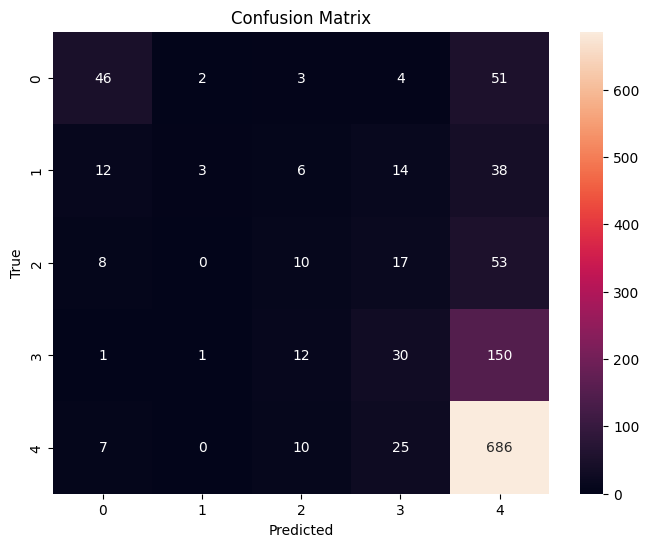

In [48]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [49]:
# Prediction function
def predict_review(text):
  text = clean_text(text)
  text = tfidf.transform([text])
  rating = final_model.predict(text)[0]
  print(f'Predicted Star Rating: {rating}')

# ***Prediction 1***

In [50]:
sample_text = "Worst purchase ever, totally disappointed!"
predict_review(sample_text)

Predicted Star Rating: 1


# ***Prediction 2***

In [51]:
sample_text = "Absolutely fantastic! Exceeded my expectations, highly recommend it!"
predict_review(sample_text)

Predicted Star Rating: 5


# ***Prediction 3***

In [52]:
sample_text = "This product is terrible, completely useless and a waste of money."
predict_review(sample_text)

Predicted Star Rating: 1


# ***Prediction 4***

In [53]:
sample_text = 'Not so happy, but its okay'
predict_review(sample_text)

Predicted Star Rating: 3


In [54]:
# Save the model
import pickle
pickle.dump(final_model,open('model.pkl','wb'))

In [55]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))